# **지도학습 기반의 신용카드 사기 탐지**



# **목차**
### 1. EDA
### 2. 지도 학습 기반의 머신러닝
#### 2-1.Logistic regression
#### 2-2.기본 Tree 모델
##### - Decision Tree
#### 2-3.배깅
###### - Random Forest
#### 2-4.부스팅 
##### - Gradient Boosting
##### - XGBoost 
##### - LightGBM




In [ ]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


## **1.EDA**

먼저 다양한 머신러닝 모델에 대해 알아보기 전에 EDA에 대해서 설명하도록
하겠습니다.🧐

1.EDA 정의

EDA란 Exploratory Data Analysis로, 탐색적 데이터 분석을 의미합니다.


벨연구소 수학자 '존튜처'가 개발한 데이터 분석 과정 개념으로 분석할 데이터에
대한 '탐색과 이해'를 가져오는 것을 목적으로 합니다.



2.EDA 수행을 위한 3가지 기술

성공적인 EDA의 수행을 위해서는 3가지 기술이 필요합니다.😀

첫번째 기술로 **raw datad을 description을 통해 데이터의 각 행과 열에 대한 의미를 이해하는 기술**이 필요합니다.

두번째 기술은 **결측치 처리 및 데이터 필터링 기술**입니다.
머신러닝 알고리즘은 누락된 데이터가 있을 때 역할을 제대로 하지 못하는데요.
결측치를 잘못 처리할 경우 결과 반영에도 문제가 있으며 모델 성능을 하락시키는
요인이 되기도 합니다. 신중하게 접근해야 할 필요가 있습니다.

마지막 세번째 기술은 **가독성 높은 인사이트를 도출하는 기술**입니다.
그래프가 미관상 완벽해도 index와 value값을 제대로 만들지 못하면 그래프를 보고
해석하기 어렵습니다.

3.EDA types

효율적인 데이터 탐색을 위해서는 그래프를 사용 목적에 맞게 사용하는 것이 중요합니다.의미 있는 정보 전달을 위해 어떤 그래프가 있는지 살펴보겠습니다.

<image src='https://drive.google.com/uc?id=1IMBibaJc26U0QQpWr5iliRrAHY_uBwnp' height=350 width=500>

4.EDA tools

또한 EDA는 **다양한 목적으로 사용**되는데요😳
다양한 목적에 따라 사용하기 적합한 여러 툴이 존재합니다.

1)대시보드 생성
: tableau,google spreadsheet,zepplin 등


2)심화된 데이터 전처리 모델링
:r, sql 등


3)빠른 커뮤니케이션
: excel,google spreadsheet,python 등




5.EDA에서의 이상탐지 처리


eda는 분석에 많은 도움이 됩니다. 효율적인 시각적 표현으로 데이터 개별 속성 내 어떤 이상값이 있으며 이는 통계 지표 결정에 큰 도움을 줍니다. 점 플롯, 워드 클라우드 , 시계열 차트 , 지도 등의 시각화 방법이 있습니다.

다음으로는 EDA 실습입니다.

저희는 핸즈온 비지도 학습 chapter2 내에 있는 credit card 데이터를 실습하였습니다!

In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
%matplotlib inline

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
from PIL import Image


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/코랩/credit_card.csv')

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


- 결측값 ('Time','Amount','Class'은 제외)

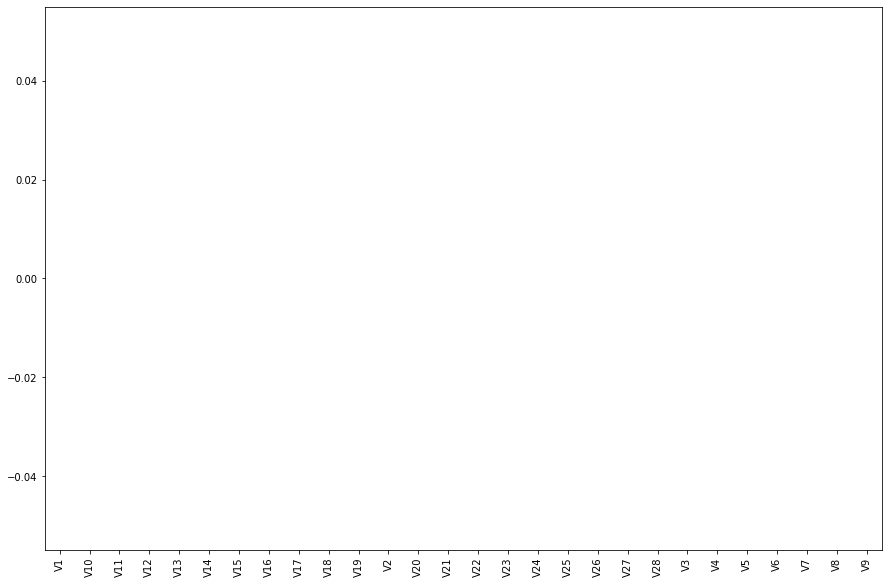

In [ ]:
nanCounter = np.isnan(data).sum()
data[data.columns.difference(['Time','Amount','Class'])].isnull().sum().plot(kind='bar',figsize=(15,10))

- 고윳값 식별

In [ ]:
distinctCounter = data.apply(lambda x: len(x.unique()))
distinctCounter

- 레이블 배열 분리

In [ ]:
dataX=data.copy().drop(['Class'],axis=1)
dataY=data['Class'].copy()

- 표준화 진행
- 표준화를 진행하되, 진행해서 안되는 피처는 제외하고 표준화 실시하기(거래시간 표준화 제외하기)

In [ ]:
featureToScale=dataX.drop(['Time'],axis=1).columns # time 제외 columns
sX=pp.StandardScaler(copy=True)
dataX.loc[:,featureToScale]=sX.fit_transform(dataX[featureToScale]) #타겟변수 제외+ time변수 제외 데이터에 한해 표준화 시행하기

- check> time제외 정규화 진행된 것을 볼 수 있다.

In [ ]:
dataX

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.0,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,1.0,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,1.0,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,2.0,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,172787.0,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,172788.0,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,172788.0,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


- 피처 간 상관관계를 확인

In [ ]:
correlationMatrix=pd.DataFrame(data=[],index=dataX.columns)

In [ ]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
          #피어슨 상관계수 활용하여 피처 간 상관관계를 확인
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

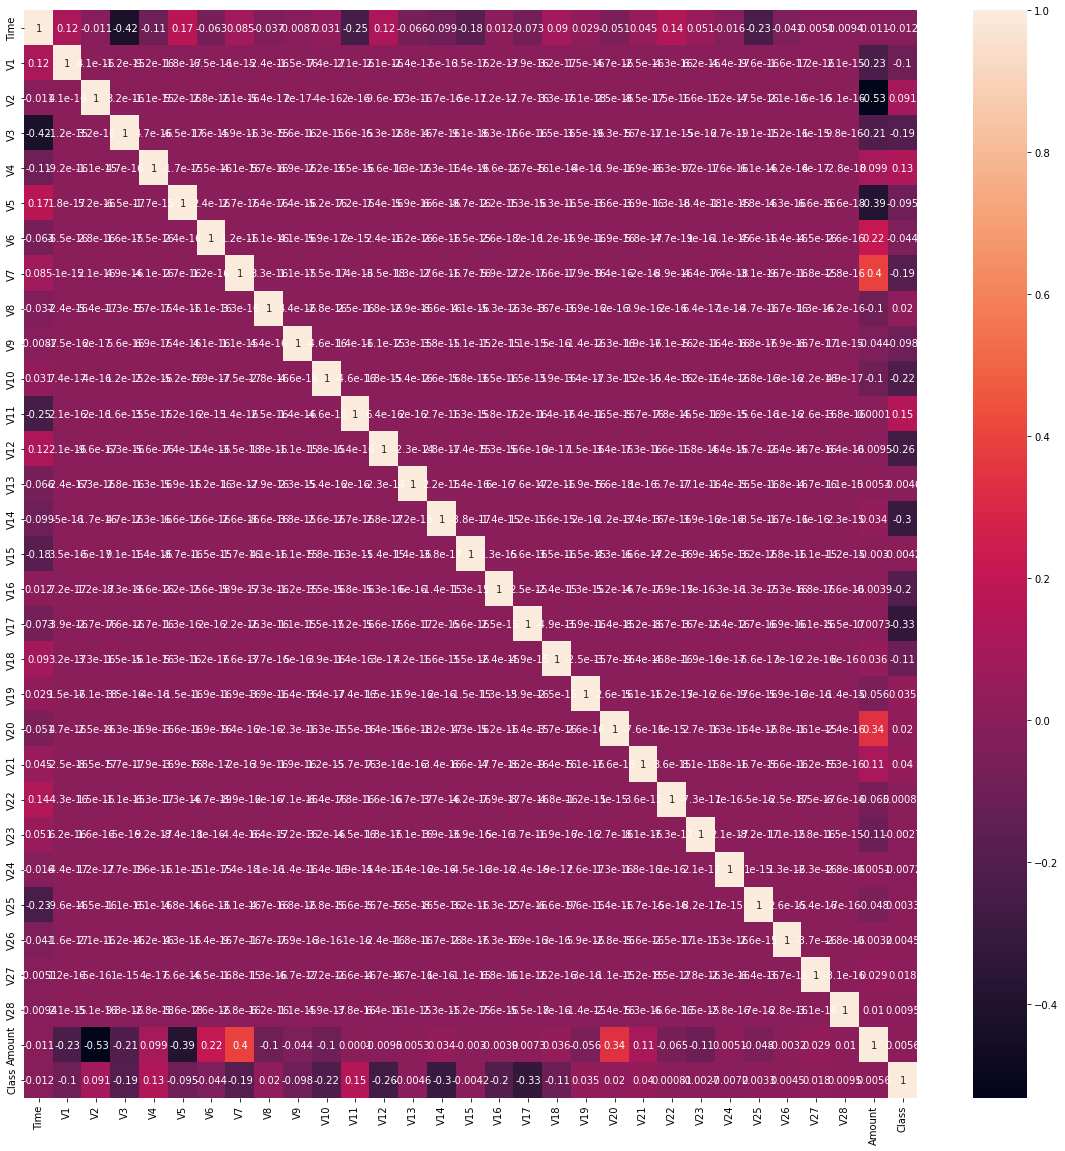

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

- Time과 상관관계 높은 변수:v3,v11,v25

No handles with labels found to put in legend.


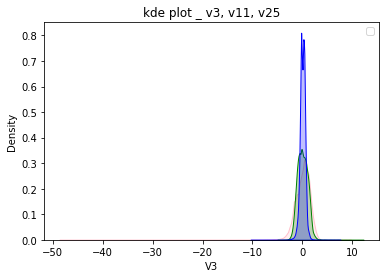

In [ ]:
sns.kdeplot(data['V3'], shade=True,color='pink')
sns.kdeplot(data['V11'], shade=True,color='green')
sns.kdeplot(data['V25'], shade=True,color='blue')
plt.legend()
plt.title('kde plot _ v3, v11, v25')
plt.show()

- time card transactions

In [ ]:
import datetime
def convert_totime(seconds):
    return datetime.datetime.fromtimestamp(seconds);

timeAnalysis = data[['Time', 'Amount', 'Class']].copy()
timeAnalysis['datetime'] = timeAnalysis.Time.apply(convert_totime)

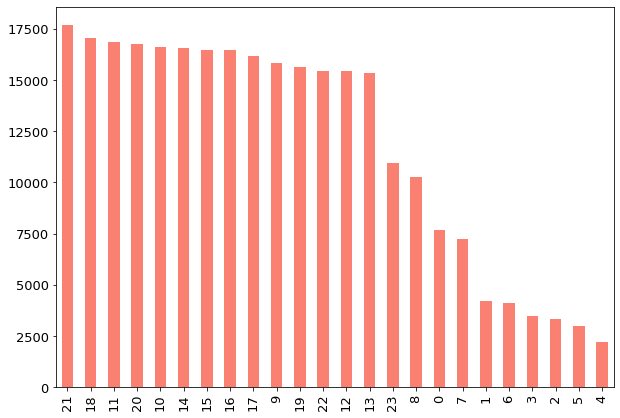

In [ ]:
timeAnalysis['datetime'].dt.hour.value_counts().head(24).plot(kind='bar',color='salmon',figsize=(10,7),fontsize=13)

- 데이터 시각화 하기
- 얼마나 불균형 한가?
- 시각화 결과를 볼 경우 학습할 사기 사례가 너무 적어 해결하는 것 자체가 x

Text(0, 0.5, 'Frequency Percentage')

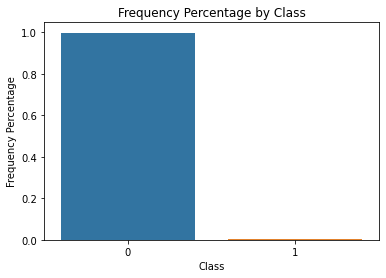

In [ ]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=[tuple(count_classes/len(data))[0],tuple(count_classes/len(data))[1]])
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

## **2.지도학습 기반의 머신러닝**

지도 학습이란 훈련 데이터로부터 하나의 함수를 유추해내기 위한 기계 학습의 한 방법으로 알고리즘에 주입하는 훈련 데이터에 레이블이라는 '답'이 포함되어야 합니다.

지도 학습을 위한 알고리즘 방식은 매우 다양합니다.
하나씩 알아보도록 하겠습니다.😄

### **2-1.Logistic regression**

1.로지스틱 회귀란?

  - 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘입니다.

  -  독립 변수의 선형 결합으로 종속 변수를 설명한다는 관점에서는 선형 회귀 분석과 유사하나  선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법으로도 볼 수 있습니다.



2. 로지스틱 회귀의 특징

   -  로지스틱 모형 식은 독립 변수가 (-∞,∞)의 어느 숫자이든 상관이 없으며, 종속 변수 또는 결과 값이 항상 범위 [0,1] 사이에 있도록 합니다.

  -   오즈(odds)를 로짓(logit) 변환을 수행함으로써 얻어집니다.

<igm src='https://drive.google.com/file/d/10diVmtxO4WPvUx1bOfrEVdhbjV8dy55j/view?usp=sharing' width=300 height=400>

[✋잠깐! 오즈와 로짓 변환은 무엇일까?🤚]

📢오즈(odds)란 임의의 사건 A가 발생하지 않을 확률 대비 일어날 확률의 비율을 뜻하는 개념입니다.

(성공 확률이 실패 확률에 비해 몇배 더 높은가를 나타냅니다.)



📢로짓변환이란 오즈에 로그를 취한 함수로 입력값의 범위가 [0,1]일때 출력 값의 범위를 (-∞,∞) 로 조정합니다.



3.로지스틱 회귀- 이항 & 다항 로지스틱 회귀

01) 이항 로지스틱 회귀


- 종속변수가 (성공, 실패)와 같은 binary 형태입니다.

이항 로지스틱 회귀의 결정경계
- 범주가 0, 1 (2가지)라고 가정했을때, 입력벡터 x을 넣으면 범주 1에 속할 확률과 확률값은 간단

02) 다항 로지스틱 회귀


-  종속변수가 3개 이상의 multi형태입니다.
다항 로지스틱 회귀 특성

- 범주가 3개이지만 이항 로지스틱 회귀 모델 2개를 이용합니다.

( 3번째 범주 모델은 첫번째 범주가 속할 확률과 두번째 범주가 속할 확률사실 이용하고 있습니다.)


<image src='https://drive.google.com/uc?id=1nhd5K09fcPahCpxVQUgCbAw1MYHZBga2' height=300 width=700>

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(dataX, dataY, test_size=0.2, random_state=2018, stratify=dataY)

In [ ]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)
################################################################################################33

model = logReg


trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])



for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, 
                               model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, 
                         predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

### **2-2.기본 Tree 모델**

#### Decision Tree


- 단일 의사 결정 트리로, AI가 훈련 데이터를 한번 통과한 후 레이블에 의해 데이터를 분할하는 규칙을 만들고, 만들어진 트리를 사용해 새로운 검증 또는 테스트 데이터셋을 예측하는 방법입니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#수행 시간 측정을 위한 시작 시간 측정
start_time = time.time()

#Decision Tree 모델 생성
model_tree = DecisionTreeClassifier(random_state = 42)

#Test 데이터 학습
model_tree = model_tree.fit(X_train, y_train)

#X_test 데이터를 사용해 y_test 타겟 레이블 예측
tree_pred = model_tree.predict(X_test)

#모델의 예측 성능을 log_loss를 이용하여 출력
print("dicision tree 모델 손실 값: %.4f" %log_loss(y_test, tree_pred))

#수행 시간 출력
print("dicision tree 모델 수행 시간: %.1f 초" %(time.time()-start_time))

dicision tree 모델 손실 값: 0.0285
dicision tree 모델 수행 시간: 25.8 초


### **2-3.배깅**

#### Random Forest

랜덤 포레스트는 의사결정나무 모델을 이용해서 앙상블을 이용한 모델입니다.

랜덤 포레스트의 특징은 다음과 같습니다.

1.Los Computational coplexity:
- 데이터가 많아도 모델을 빨리 구축할 수 있습니다.

2.Nonparametric:
- 데이터 분포가 필요 없습니다.

3.Bootstrap 기법 이용:
- 원래 데이터의 수만큼 복원을 추출합니다.

4.의사결정나무모델 구축시 변수를 무작위로 선택할 수 있습니다.

- 이는 Random Subspace method입니다.

<image src='https://drive.google.com/uc?id=1vkM0QIVPxZ8tiJB9LTXAjmr7c2JA2Kvn' height=300 width=600>

랜덤 포레스트 모델을 학습 한 뒤 '변수 중요도'를 확인하는 경험은 중요합니다.
많은 변수 중 가장 예측력이 강한 변수가 무엇인지 대략적으로 확인할 수 있습니다.
특히 랜덤 포레스트는 블랙박스 모형이기 때문에 '변수 중요도'를 통해 설명변수와
반응변수의 설명력을 확보해야합니다.

<✔확인하고 넘어가자!>

변수 중요도란 무엇일까요? 통계적으로 엄람나 유의한지 알 수 없지만 간점적으로 변수의 중요도를 구할 수 있음을 의미합니다. 예측 성능에 중요한 역할을 하는지 추정하고는 합니다.


🖐그렇다면, 변수 중요도를 구하기 위한 방법은 어떻게 될까요?🖐


step1.원래데이터 집합에서 Out Of Bag(OOB)를 구합니다.

step2.특정 변수의 값을 임의로 뒤섞은 데이터 집합에 대해서 OOB error를 구합니다.

step3.개별 변수의 중요도는 1단계와 2단계 OOB error 차이의 평균과 분산을 고려하여 결정합니다.


<image src='https://drive.google.com/uc?id=1w-0slUP2fOgebTugve5ZyrteuvFlO6Qt' width=500 height=300>

##### 파라미터
- n_estimators: 결정트리의 개수
- max_features: 루트 피쳐 개수 만큼 지정
- max_depth: 트리의 최대 깊이 (완벽하게 클래스가 결정될 때까지 분할)
- min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수
- min_samples_leaf: 리프 노드에 있어야 할 최소 샘플 수
- min_weight_fraction_leaf: min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_leaf_nodes: 리프노드의 최대 개수
- bootstrap: 붓스트랩 기법 유무
- oob_score: 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부
- n_jobs: 시스템적인 요소
- class_weight: 불균형 class인 경우 사용

In [ ]:
n_estimators = 10 # 결정트리의 갯수
max_features = 'auto' # 루트 피쳐 개수 만큼 지정
max_depth = None  # 트리의 최대 깊이 (완벽하게 클래스가 결정될 때까지 분할)
min_samples_split = 2  # 노드를 분할하기 위한 최소한의 샘플 데이터 수
min_samples_leaf = 1  # 리프 노드에 있어야 할 최소 샘플 수
min_weight_fraction_leaf = 0.0 # min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
max_leaf_nodes = None  # 리프노드의 최대 개수
bootstrap = True  # 붓스트랩 기법 유무
oob_score = False # 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부
n_jobs = -1  # 시스템적인 요소
random_state = 2018
class_weight = 'balanced'  # 불균형 class인 경우 사용

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [ ]:
#수행 시간 측정을 위한 시작 시간 측정
start_time = time.time()

#Random Forest 모델 생성
model_forest = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

#Test 데이터 학습
model_forest = model_forest.fit(X_train, y_train)

#X_test 데이터를 사용해 y_test 타겟 레이블 예측
forest_pred = model_forest.predict(X_test)

#모델의 예측 성능을 log_loss를 이용하여 출력
print("random forest 모델 손실 값: %.4f" %log_loss(y_test, forest_pred))

#수행 시간 출력
print("random forest 모델 수행 시간: %.1f 초" %(time.time()-start_time))

random forest 모델 손실 값: 0.0152
random forest 모델 수행 시간: 6.9 초


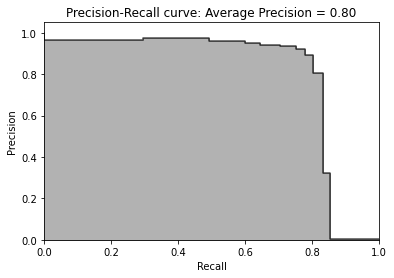

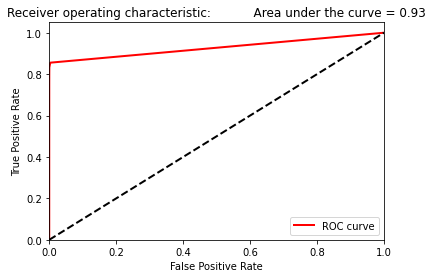

In [ ]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### **2-4.부스팅**

#### Gradient Boosting
- 회귀분석 또는 분류 분석을 수행할 수 있는 예측모형이며 예측모형의 앙상블 방법론 중 부스팅 계열에 속하는 알고리즘입니다.

In [ ]:
import time
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#수행 시간 측정을 위한 시작 시간 측정
start_time = time.time()

#Gradient Boosting 모델 생성
model_gbm = GradientBoostingClassifier(random_state = 42)

#Test 데이터 학습
model_gbm = model_gbm.fit(X_train, y_train)

#X_test 데이터를 사용해 y_test 타겟 레이블 예측
gbm_pred = model_gbm.predict(X_test)

#모델의 예측 성능을 log_loss를 이용하여 출력
print("gradient boosting 모델 손실 값: %.4f" %log_loss(y_test, gbm_pred))

#수행 시간 출력
print("gradient boosting 모델 수행 시간: %.1f 초" %(time.time()-start_time))

gradient boosting 모델 손실 값: 0.0503
gradient boosting 모델 수행 시간: 356.4 초


#### XGBoost

XGBoost는 여러 개의 의사결정나무를 앙상블(부스팅)하는 알고리즘입니다.
이때 부스팅 방식은 한 개의 예측 모델에 대한 error를 줄이는 방식입니다.

XGBoost의 특징
-  병렬 학습이 지원되어서 GBM 모델보다 더 빠른 학습이 가능합니다.
-  Overfitting을 방지하도록 목적함수에 Regularization Term 추가합니다.

- Greedy 알고리즘을 사용하여 가지치기를 수행하고 early stopping 기능을 지원하기 때문에 과적합이 잘 일어나지 않음

<image src='https://drive.google.com/uc?id=1BPLLjhlf3wexBEBbTsXxRSQpWmPzDBsM' height=180 width= 600>

XGBoost는 트리의 최적 모델을 위해 찾을 수 있는 방법이 다양합니다.


- Basic Exact Greedy Algorithm
- Approximate Greedy Algorithm
- Weighted Quantile Sketch
- Sparsity-aware Split Finding

여기서 Basic Exact Greedy Algorithm은 모든 feature의 가능한 모든 split을 다 해보는 알고리즘입니다.

##### 파라미터
- nthread: 병렬 처리 조절
- gamma: Overfitting 방지에 좋으나 너무 높으면 underfitting 이 생길 수가 있음.
- max_depth: 최대 트리의 깊이
- max_delta_step: 평상시에 필요하지 않지만, 클래스가 극도로 불균형한 경우 도움이 될 수 있음.
- subsample: 각각의 스탭마다 사용할 샘플의 비율. 1 이하의 값을 사용하면 오버 피팅을 방지할 수 있음.
- colsample_bytree: 1.0, # 각각의 트리(스탭)마다 사용할 칼럼(Feature)의 비율


In [ ]:
params_xGB = {
    'nthread':16, # 병렬 처리 조절
    'learning rate': 0.3, #range 0 to 1, default 0.3
    'gamma': 0, #range 0 to infinity, default 0  => Overfitting 방지에 좋으나 너무 높으면 underfitting 이 생길 수가 있음.

    'max_depth': 6, # 최대 트리의 깊이. N이라고 가정하면 2^N개의 리프 노드가 생긴다.
    'min_child_weight': 1, # 자식에게 필요한 인스턴스 가중치(헤시안)의 최소 합계
    'max_delta_step': 0, # 평상시에 필요하지 않지만, 클래스가 극도로 불균형한 경우 도움이 될 수 있음.
    'subsample': 1.0, # 각각의 스탭마다 사용할 샘플의 비율. 1 이하의 값을 사용하면 오버 피팅을 방지할 수 있다.
    
    'colsample_bytree': 1.0, # 각각의 트리(스탭)마다 사용할 칼럼(Feature)의 비율
        # subsample ratio of features
    'objective':'binary:logistic', # 범주형 데이터 이므로
    'num_class':1,
    'eval_metric':'logloss',  # 평가지표
    'seed':2018,
    'silent':1
}

In [ ]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                    index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
                 nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
    best_rounds = np.argmin(bst['test-logloss-mean'])
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossXGBoostGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

[0]	train-logloss:0.437933+6.60588e-05	test-logloss:0.438042+8.49061e-05
[50]	train-logloss:0.0001282+8.79545e-06	test-logloss:0.003109+0.00105224
[100]	train-logloss:5.16e-05+2.05913e-06	test-logloss:0.0033562+0.00116896
[150]	train-logloss:3.8e-05+1.26491e-06	test-logloss:0.0034524+0.00120571
[200]	train-logloss:3.18e-05+9.79796e-07	test-logloss:0.0035064+0.00122686
Training Log Loss:  0.0007751843602187022
CV Log Loss:  0.002566085069336188
[0]	train-logloss:0.437893+5.38256e-05	test-logloss:0.438053+6.26527e-05
[50]	train-logloss:0.0001412+7.98499e-06	test-logloss:0.003004+0.000585576
[100]	train-logloss:5.32e-05+1.46969e-06	test-logloss:0.0032934+0.000674451
[150]	train-logloss:3.88e-05+7.48331e-07	test-logloss:0.0034136+0.00070102
[200]	train-logloss:3.24e-05+1.0198e-06	test-logloss:0.00349+0.000715481
Training Log Loss:  0.0008714578598654826
CV Log Loss:  0.002863186438033642
[0]	train-logloss:0.437889+6.61713e-05	test-logloss:0.438021+6.72327e-05
[50]	train-logloss:0.0001404+1

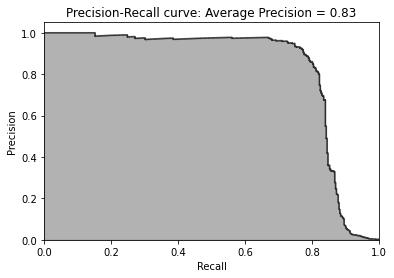

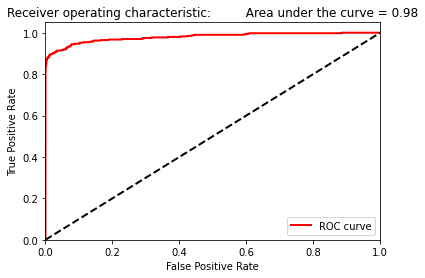

In [ ]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictionsTestSetXGBoostGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
    bst.predict(dtest)
logLossTestSetXGBoostGradientBoosting = \
    log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

#### LightGBM

마지막으로 LightGBM 모델을 소개하겠습니다.😀

틀린 부분에 가중치를 더하면서 진행하는 알고리즘으로 
데이터셋이 작으면 과적합되기 쉽다는 특징을 가지고 있습니다.XGBoost와 비교해보았을때 빠른 학습속도와 적은 메모리를 사용한다는 점에서 가장 큰 장점입니다.그러나 overfitting에 취약하며 데이터 양이 적은 경우 사용을 자제해 줄 필요가 있습니다.

LGBM은 level-wise인 다른 알고리즘과 다르게 **Leaf-wise**방식을 취하고 있습니다.
최대 손실 값을 가지는 리프노드를 지속적으로 분할하면서 트리가 깊어지고 비대칭적으로 생성하여 예측 오류 손실을 최소화하는 트리 분할 방식입니다.
속도가 빠르다는 것이 장점이며 큰 데이터셋으로 빠른 구현이 가능합니다.

<image src='https://drive.google.com/uc?id=1ACWucYRpBeDuxx4PKCSzxnyDg2V0B2Da' width=400 height=300>


##### 파라미터
- boosting: 실행하고자 하는 알고리즘 타입 정의
- metric: loss를 측정하기 위한 기준
- max_depth: 나무의 깊이
- num_leaves: 결정나무에 있을 수 있는 최대 잎사귀 수
- learning_rate: 학습률
- feature_fraction: featrute의 일부를 선택하는 것을 통제하는 파라미터
- bagging_fraction: 데이터 일부만을 사용하는 bagging의 비율

In [ ]:
params_lightGB = {
    'task': 'train',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': -1,
    'num_threads':16
}

In [ ]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

[1]	valid_0's binary_logloss: 0.00599592
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00594295
[3]	valid_0's binary_logloss: 0.00589337
[4]	valid_0's binary_logloss: 0.00584598
[5]	valid_0's binary_logloss: 0.00579673
[6]	valid_0's binary_logloss: 0.00575087
[7]	valid_0's binary_logloss: 0.00570526
[8]	valid_0's binary_logloss: 0.00565973
[9]	valid_0's binary_logloss: 0.00561733
[10]	valid_0's binary_logloss: 0.00557488
[11]	valid_0's binary_logloss: 0.00553112
[12]	valid_0's binary_logloss: 0.00548974
[13]	valid_0's binary_logloss: 0.00544851
[14]	valid_0's binary_logloss: 0.0054098
[15]	valid_0's binary_logloss: 0.00536826
[16]	valid_0's binary_logloss: 0.00533144
[17]	valid_0's binary_logloss: 0.00529568
[18]	valid_0's binary_logloss: 0.00525941
[19]	valid_0's binary_logloss: 0.00522391
[20]	valid_0's binary_logloss: 0.00519219
[21]	valid_0's binary_logloss: 0.00515661
[22]	valid_0's binary_logloss: 0.00512678
[23]	valid_0's binary_l

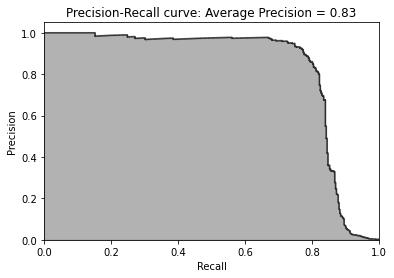

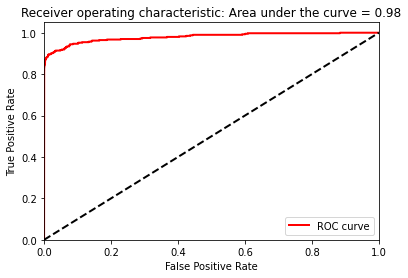

In [ ]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
    gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = \
    log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)